# Clustering with KMeans

# KMeans functions

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def fun_kmeans_bechmark(X, max_k, standard_scaler=True):

    # Standardizing the features
    if (standard_scaler):
        X_standard = StandardScaler().fit_transform(X)
    else:
        X_standard = X
        
    ks = range(1, max_k)
    km = [KMeans(n_clusters = i).fit(X_standard) for i in ks]
    
    return km

# Plots

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import (accuracy_score, confusion_matrix)

# The Elbow method is a method of interpretation and validation of 
# consistency within cluster analysis designed to help finding the 
# appropriate number of clusters in a dataset.
#
# Variance explained: Sum of squared distances of samples to their closest cluster center
def plot_elbow(matrix, kmeans_models):
    
    score = [
        kmeans_models[i].score(matrix) for i in range(len(kmeans_models))
    ]
    
    plt.figure()
    
    plt.subplots(nrows=1, ncols=4)
    plt.tight_layout()
    
    plt.subplot(121)
    plt.plot(range(len(kmeans_models)), score, 'bo-', alpha=0.8, linewidth=2, color='purple')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Variance Explained')
    plt.title('Elbow Curve')
    
    cumsum_score = 100 * np.cumsum(score) / np.sum(score)

    plt.subplot(122)
    plt.plot(range(len(kmeans_models)), cumsum_score, 'bo-', alpha=0.8, linewidth=2, color='orange')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Percent of Variance Explained')
    plt.title('Elbow Curve')
    
    plt.show();
    
# 
def plot_confusion_matrix(y_true, y_pred):
    
    # Now we can check how accurate our unsupervised clustering was 
    # in finding similar digits within the data. The correct grouping 
    # for X%
    print('\nAccuracy Score: %.2f%%' % (100*accuracy_score(y, y_pred)))
    
    mat = confusion_matrix(y, y_pred)
    
    plt.figure()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title('Confusion Matrix\n')
    
    plt.show();

# Example

In [125]:
import pandas as pd
import numpy as np

# Display a pandas dataframe format using print()
pd.options.display.float_format = '{:,.3f}'.format
# 
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [126]:
from sklearn.datasets import make_blobs

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

<Figure size 432x288 with 0 Axes>

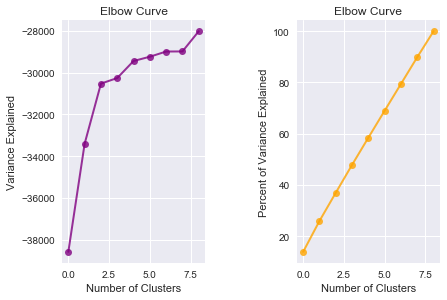

In [129]:
# With Standard Scale

max_k = 10
km_with_ss = fun_kmeans_bechmark(X, max_k)
plot_elbow(X, km_with_ss)

<Figure size 432x288 with 0 Axes>

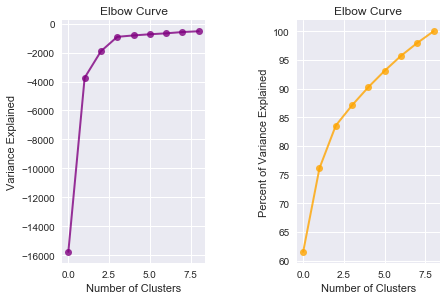

In [130]:
# Without Standard Scale

max_k = 10
km_without_ss = fun_kmeans_bechmark(X, max_k, standard_scaler=False)
plot_elbow(X, km_without_ss)

[6 3 1 4 2 0 2 2 2 2 6 3 2 0 2 3 2 3 0 2 1 1 2 4 2 2 0 0 1 2 3 4 2 6 2 6 5
 1 6 5 2 1 0 2 2 6 1 2 4 4 0 5 5 2 3 5 5 5 5 2 4 4 1 2 4 2 3 2 5 5 3 1 2 6
 2 2 6 2 2 5 0 4 1 4 0 5 3 4 5 5 0 3 1 2 0 3 3 2 3 0 0 3 4 1 4 2 2 0 4 5 2
 6 4 5 4 5 0 2 0 2 5 3 3 5 2 1 0 6 3 2 0 1 1 1 5 3 0 2 4 4 2 3 2 0 0 4 2 2
 6 3 5 1 4 6 0 1 5 1 5 5 1 1 1 5 0 3 6 3 2 0 3 1 2 3 0 1 1 1 1 3 2 5 0 3 6
 5 2 6 6 3 4 0 6 3 2 4 2 6 3 4 6 5 4 2 2 3 2 5 6 2 1 2 5 3 2 2 2 0 1 4 2 3
 5 2 1 1 1 0 1 0 6 1 6 5 4 4 5 3 0 6 2 5 3 6 3 6 2 1 6 5 2 0 4 2 2 0 5 2 1
 0 2 0 5 5 0 2 6 6 5 1 1 2 0 4 2 0 5 3 0 3 0 6 3 0 3 4 4 2 1 1 5 2 2 1 6 0
 6 3 3 2 5 2 6 1 3 3 1 3 3 5 0 3 2 2 0 0 1 6 4 0 2 6 4 0 2 1 4 1 2 3 6 4 1
 6 2 4 4 2 2 2 6 2 4 0 1 4 0 4 4 6 6 2 4 5 2 3 4 5 0 2 0 5 2 5 0 2 2 6 0 6
 3 3 6 6 3 5 3 0 6 4 0 5 4 2 5 3 3 0 5 0 2 3 1 5 6 5 5 4 0 6 5 2 0 2 2 6 6
 2 6 5 5 6 1 3 1 0 3 4 1 2 0 1 2 0 3 2 0 0 1 2 5 2 6 4 3 2 4 3 3 6 5 0 2 6
 2 2 1 1 6 2 2 2 2 2 2 3 2 5 6 2 4 2 4 2 1 1 0 0 0 1 2 5 6 1 4 2 3 0 3 4 3
 2 0 0 3 5 2 3 5 5 5 3 2 

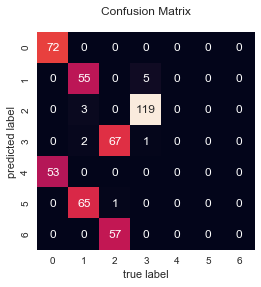


Accuracy Score: 12.00%


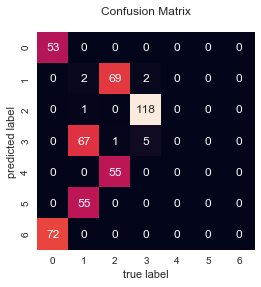

In [142]:
from sklearn.metrics import (accuracy_score, confusion_matrix)

# KMeans model selection
km_with_ss_7 = km[6]
km_without_ss_7 = km[6]

# Compute cluster centers and predict cluster index for each sample
y_pred_with_7 = km_with_ss_7.fit_predict(X)
y_pred_without_7 = km_without_ss_7.fit_predict(X)

print(y_pred_with_7)
print(km_with_ss_7.fit(X).predict(y))

plot_confusion_matrix(y, y_pred_with_7)
plot_confusion_matrix(y, y_pred_without_7)